# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fatwa Nurhidayat
- **Email:** fatwanurhdyt@student.ub.ac.id
- **ID Dicoding:** MC006D5Y2029

## Menentukan Pertanyaan Bisnis

- **Bagaimana tren penggunaan sepeda sepanjang hari?** Untuk mengetahui jam-jam dengan  penggunaan sepeda tertinggi setiap harinya.  
- **Bagaimana pengaruh musim terhadap penggunaan sepeda?** Untuk mengidentifikasi musim dengan tingkat penggunaan sepeda tertinggi dan terendah.  

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [2]:
print("Pandas:", pd.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Seaborn:", sns.__version__)
print("Streamlit:", st.__version__)

Pandas: 2.2.1
Matplotlib: 3.8.4
Seaborn: 0.12.2
Streamlit: 1.30.0


## Data Wrangling

### Gathering Data

In [3]:
day = pd.read_csv('data/day.csv')
hour = pd.read_csv('data/hour.csv')

In [4]:
print("Bike Sharing Dataset - Day")
day

Bike Sharing Dataset - Day


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [5]:
print("Bike Sharing Dataset - Hour")
hour

Bike Sharing Dataset - Hour


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Dataset mencakup data dari tahun 2011 hingga 2012.  
- `day.csv` memiliki **731 baris**, sedangkan `hour.csv` memiliki **17.379 baris**. Perbedaan utama antara keduanya adalah `hour.csv` memiliki kolom `hr` (hour), yang menunjukkan data peminjaman sepeda per jam.

### Assessing Data

#### Assesing Data - `day.csv`

##### Tipe data

In [6]:
print(day.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


**Insight:**
- Data pada kolom **dteday** bertipe *object*, sedangkan isinya merupakan tanggal. Kolom tersebut akan lebih mempermudah analisis jika diubah menjadi data bertipe *datetime*.

##### Missing values

In [7]:
print(day.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Dataset `day.csv` tidak memiliki missing values.

##### Duplicates

In [8]:
print(day.duplicated().sum())

0


**Insight:**
- Dataset `day.csv` tidak memiliki duplicates.

##### Outliers

###### Deteksi outliers

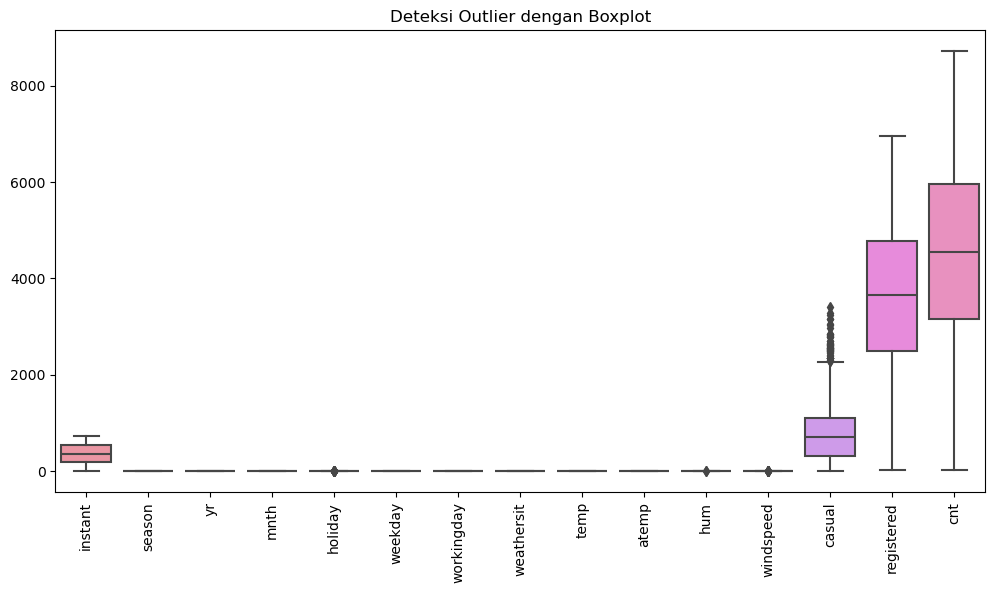

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data=day.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.title("Deteksi Outlier dengan Boxplot")
plt.show()

**Insight**:
- Pada grafik kolom **holiday**, **hum**, **windspeed**, **casual** dicurigai terdapat outliers. Agar lebih jelas dapat divisualisasi ulang dengan lebih dekat.

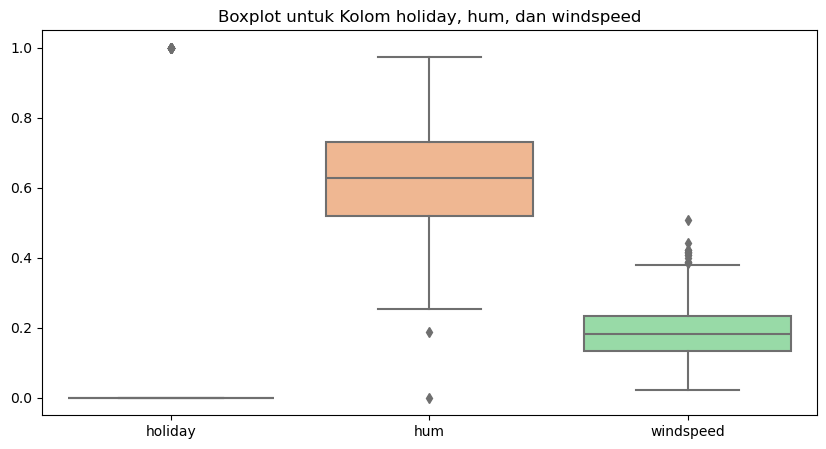

In [10]:
hhw = ['holiday', 'hum', 'windspeed']
plt.figure(figsize=(10, 5))
sns.boxplot(data=day[hhw], palette="pastel")
plt.title("Boxplot untuk Kolom holiday, hum, dan windspeed")
plt.show()

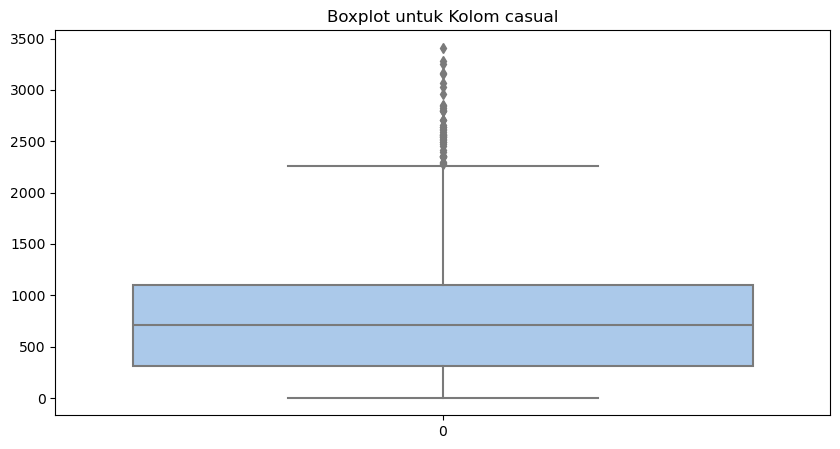

In [11]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=day['casual'], palette="pastel")
plt.title("Boxplot untuk Kolom casual")
plt.show()

###### Outliers holiday

In [12]:
q1 = day['holiday'].quantile(0.25)
q3 = day['holiday'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

outliers = day[(day['holiday'] < batas_bawah) | (day['holiday'] > batas_atas)]

print('Outliers pada Kolom holiday')
outliers ['holiday']

Outliers pada Kolom holiday


16     1
51     1
104    1
149    1
184    1
247    1
282    1
314    1
327    1
359    1
366    1
380    1
415    1
471    1
513    1
550    1
611    1
646    1
681    1
691    1
724    1
Name: holiday, dtype: int64

**Insight:**
- Nilai outliers pada kolom **holiday** hanyalah "1" artinya itu bukan outliers, hanya saja itu menandakan hari liburan yang sudah jelas lebih sedikit daripada hari biasa. Maka untuk menyelesaikannya cukup diterjemahkan/dimapping menjadi "yes" sehingga tidak terdeteksi lagi sebagai outliers.

###### Outliers hum

In [13]:
q1 = day['hum'].quantile(0.25)
q3 = day['hum'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

outliers = day[(day['hum'] < batas_bawah) | (day['hum'] > batas_atas)]

print('Outliers pada Kolom hum')
outliers ['hum']

Outliers pada Kolom hum


49    0.187917
68    0.000000
Name: hum, dtype: float64

**Insight:**
- Nilai outliers pada kolom **hum** memang outliers dan untuk menyelesaikannya bisa diubah nilai tersebut menjadi batas bawah agar tidak menjadi outliers.

###### Outliers windspeed

In [14]:
q1 = day['windspeed'].quantile(0.25)
q3 = day['windspeed'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

outliers = day[(day['windspeed'] < batas_bawah) | (day['windspeed'] > batas_atas)]

print('Outliers pada Kolom windspeed')
outliers ['windspeed']

Outliers pada Kolom windspeed


44     0.417908
49     0.507463
93     0.385571
94     0.388067
292    0.422275
382    0.415429
407    0.409212
420    0.421642
432    0.441563
433    0.414800
450    0.386821
666    0.398008
721    0.407346
Name: windspeed, dtype: float64

**Insight:**
- Nilai outliers pada kolom **windspeed** memang outliers dan untuk menyelesaikannya bisa diubah nilai tersebut menjadi batas atas agar tidak menjadi outliers.

###### Outliers casual

In [15]:
q1 = day['casual'].quantile(0.25)
q3 = day['casual'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

outliers = day[(day['casual'] < batas_bawah) | (day['casual'] > batas_atas)]

print('Outliers pada Kolom casual')
outliers ['casual']

Outliers pada Kolom casual


148    2355
183    2282
184    3065
196    2418
246    2521
281    2397
441    3155
447    2469
455    2301
456    2347
462    3252
469    2795
470    2846
476    2541
490    2496
497    2622
504    3410
505    2704
511    2855
512    3283
513    2557
518    2795
519    2494
525    2708
532    2963
533    2634
539    2657
540    2551
550    2562
560    2355
568    2544
581    2345
595    2827
609    2352
610    2613
617    2570
623    3160
630    2512
631    2454
637    2589
644    3031
658    2806
665    2643
680    2290
Name: casual, dtype: int64

**Insight:**
- Nilai outliers pada kolom **casual** memang outliers dan untuk menyelesaikannya bisa diubah nilai tersebut menjadi batas atas agar tidak menjadi outliers.

#### Assesing Data - `hour.csv`

##### Tipe Data

In [16]:
print(hour.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


**Insight:**
- Data pada kolom **dteday** bertipe *object*, sedangkan isinya merupakan tanggal. Kolom tersebut akan lebih mempermudah analisis jika diubah menjadi data bertipe *datetime*.

##### Missing values

In [17]:
print(hour.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Dataset `hour.csv` tidak memiliki missing values.

##### Duplicates

In [18]:
print(hour.duplicated().sum())

0


**Insight:**
- Dataset `hour.csv` tidak memiliki duplicates.

##### Outliers

###### Deteksi outliers

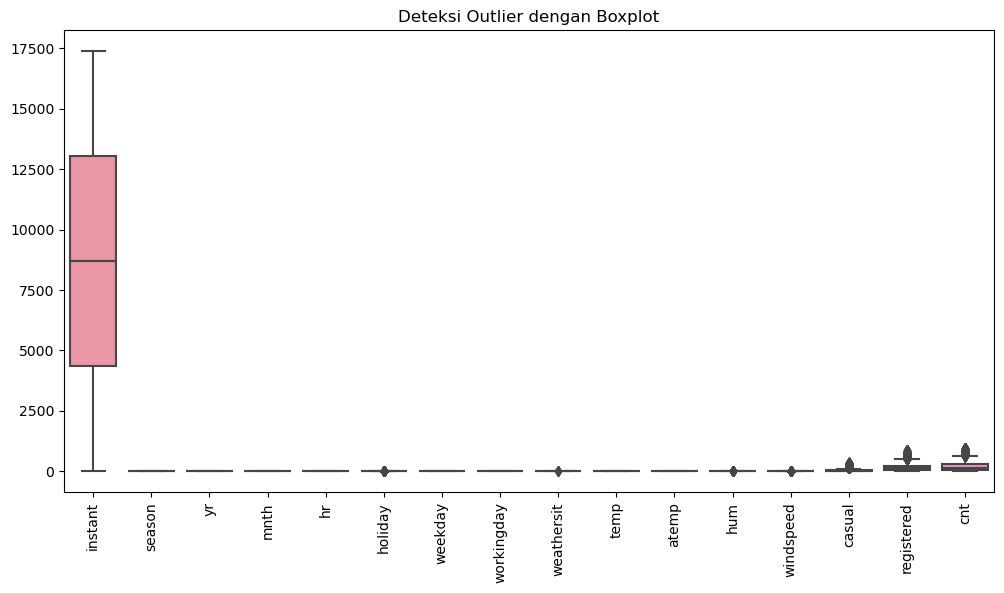

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(data=hour.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.title("Deteksi Outlier dengan Boxplot")
plt.show()

**Insight**:
- Pada grafik kolom **holiday**, **weathersit**, **hum**, **windspeed**, **casual**, **registered**, dan **cnt** dicurigai terdapat outliers. Agar lebih jelas dapat divisualisasi ulang dengan lebih dekat.

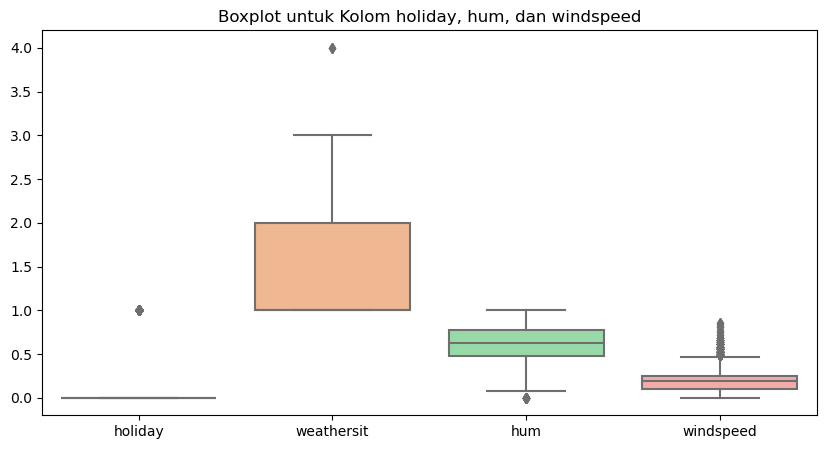

In [20]:
hwhw = ['holiday', 'weathersit', 'hum', 'windspeed']
plt.figure(figsize=(10, 5))
sns.boxplot(data=hour[hwhw], palette="pastel")
plt.title("Boxplot untuk Kolom holiday, hum, dan windspeed")
plt.show()

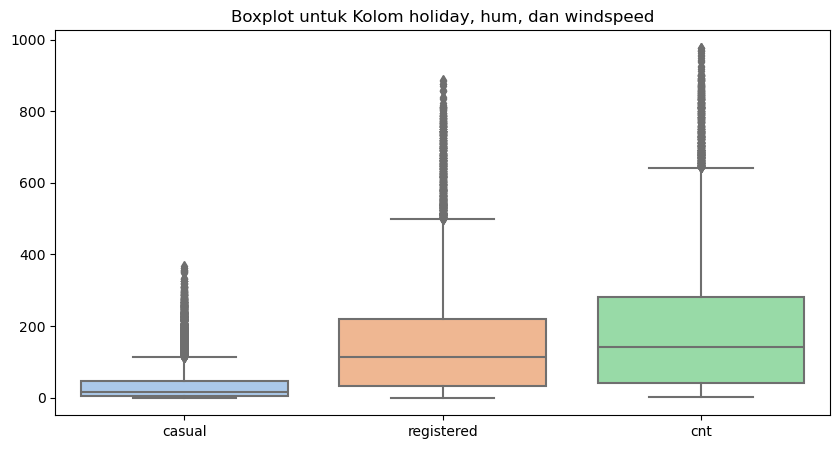

In [21]:
crc = ['casual', 'registered', 'cnt']
plt.figure(figsize=(10, 5))
sns.boxplot(data=hour[crc], palette="pastel")
plt.title("Boxplot untuk Kolom holiday, hum, dan windspeed")
plt.show()

###### Outliers holiday

In [22]:
q1 = hour['holiday'].quantile(0.25)
q3 = hour['holiday'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

outliers = hour[(hour['holiday'] < batas_bawah) | (hour['holiday'] > batas_atas)]

print('Outliers pada Kolom holiday')
outliers ['holiday']

Outliers pada Kolom holiday


372      1
373      1
374      1
375      1
376      1
        ..
17230    1
17231    1
17232    1
17233    1
17234    1
Name: holiday, Length: 500, dtype: int64

**Insight:**
- Nilai outliers pada kolom **holiday** hanyalah "1" artinya itu bukan outliers, hanya saja itu menandakan hari liburan yang sudah jelas lebih sedikit daripada hari biasa. Maka untuk menyelesaikannya cukup diterjemahkan/dimapping menjadi "yes" sehingga tidak terdeteksi lagi sebagai outliers.

###### Outliers weathersit

In [23]:
q1 = hour['weathersit'].quantile(0.25)
q3 = hour['weathersit'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

outliers = hour[(hour['weathersit'] < batas_bawah) | (hour['weathersit'] > batas_atas)]

print('Outliers pada Kolom weathersit')
outliers ['weathersit']

Outliers pada Kolom weathersit


585     4
8854    4
9123    4
Name: weathersit, dtype: int64

**Insight:**
- Nilai outliers pada kolom **weathersit** hanyalah "4" artinya itu bukan outliers. Sepertinya itu menandakan suatu kondisi cuaca. Maka untuk menyelesaikannya bisa mengubah type data nya menjadi *object* agar tidak terdeteksi sebagai outliers dan bisa diterjemahkan dengan mapping menjadi kondisi-kondisi cuaca.

###### Outliers hum

In [24]:
q1 = hour['hum'].quantile(0.25)
q3 = hour['hum'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

outliers = hour[(hour['hum'] < batas_bawah) | (hour['hum'] > batas_atas)]

print('Outliers pada Kolom hum')
outliers ['hum']

Outliers pada Kolom hum


1551    0.0
1552    0.0
1553    0.0
1554    0.0
1555    0.0
1556    0.0
1557    0.0
1558    0.0
1559    0.0
1560    0.0
1561    0.0
1562    0.0
1563    0.0
1564    0.0
1565    0.0
1566    0.0
1567    0.0
1568    0.0
1569    0.0
1570    0.0
1571    0.0
1572    0.0
Name: hum, dtype: float64

**Insight:**
- Nilai outliers pada kolom **hum** memang outliers dan untuk menyelesaikannya bisa diubah nilai tersebut menjadi batas bawah agar tidak menjadi outliers.

###### Outliers windspeed

In [25]:
q1 = hour['windspeed'].quantile(0.25)
q3 = hour['windspeed'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

outliers = hour[(hour['windspeed'] < batas_bawah) | (hour['windspeed'] > batas_atas)]

print('Outliers pada Kolom windspeed')
outliers ['windspeed']

Outliers pada Kolom windspeed


175      0.4925
178      0.5522
194      0.5224
196      0.5224
265      0.5821
          ...  
17327    0.5522
17328    0.4925
17341    0.5821
17343    0.5821
17344    0.6567
Name: windspeed, Length: 342, dtype: float64

**Insight:**
- Nilai outliers pada kolom **windspeed** memang outliers dan untuk menyelesaikannya bisa diubah nilai tersebut menjadi batas atas agar tidak menjadi outliers.

###### Outliers casual

In [26]:
q1 = hour['casual'].quantile(0.25)
q3 = hour['casual'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

outliers = hour[(hour['casual'] < batas_bawah) | (hour['casual'] > batas_atas)]

print('Outliers pada Kolom casual')
outliers ['casual']

Outliers pada Kolom casual


1633     144
1634     149
1635     124
1771     126
1772     174
        ... 
16817    122
16818    148
16819    164
16820    167
16821    139
Name: casual, Length: 1192, dtype: int64

**Insight:**
- Nilai outliers pada kolom **casual** memang outliers dan untuk menyelesaikannya bisa diubah nilai tersebut menjadi batas atas agar tidak menjadi outliers.

###### Outliers registered

In [27]:
q1 = hour['registered'].quantile(0.25)
q3 = hour['registered'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

outliers = hour[(hour['registered'] < batas_bawah) | (hour['registered'] > batas_atas)]

print('Outliers pada Kolom registered')
outliers ['registered']

Outliers pada Kolom registered


2995     539
3019     532
3067     540
3187     521
3379     524
        ... 
17063    512
17077    665
17086    536
17087    546
17101    585
Name: registered, Length: 680, dtype: int64

**Insight:**
- Nilai outliers pada kolom **registered** memang outliers dan untuk menyelesaikannya bisa diubah nilai tersebut menjadi batas atas agar tidak menjadi outliers.

###### Outliers cnt

In [28]:
q1 = hour['cnt'].quantile(0.25)
q3 = hour['cnt'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

outliers = hour[(hour['cnt'] < batas_bawah) | (hour['cnt'] > batas_atas)]

print('Outliers pada Kolom cnt')
outliers ['cnt']

Outliers pada Kolom cnt


5536     651
10358    644
10359    712
10382    676
10383    734
        ... 
16885    724
16909    688
16933    679
17053    662
17077    678
Name: cnt, Length: 505, dtype: int64

**Insight:**
- Nilai outliers pada kolom **cnt** memang outliers dan untuk menyelesaikannya bisa diubah nilai tersebut menjadi batas atas agar tidak menjadi outliers.

### Cleaning Data

#### Cleaning Data - `day.csv`

##### Mengubah tipe data yang kurang sesuai

In [29]:
day['dteday'] = pd.to_datetime(day['dteday'])

In [30]:
print(day.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


##### Menyelesaikan masalah outliers dengan Winsorizing

###### Kolom hum

In [31]:
q1 = day['hum'].quantile(0.25)
q3 = day['hum'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

day['hum']=day['hum'].apply(lambda x: batas_bawah if x < batas_bawah else (batas_atas if x > batas_atas else x))

###### Kolom windspeed

In [32]:
q1 = day['windspeed'].quantile(0.25)
q3 = day['windspeed'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

day['windspeed']=day['windspeed'].apply(lambda x: batas_bawah if x < batas_bawah else (batas_atas if x > batas_atas else x))

###### Kolom casual

In [33]:
q1 = day['casual'].quantile(0.25)
q3 = day['casual'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

day['casual']=day['casual'].apply(lambda x: batas_bawah if x < batas_bawah else (batas_atas if x > batas_atas else x))

##### Mapping kolom dengan nilai angka dengan keterangannya

###### Kolom season

In [34]:
day['season'] = day['season'].map({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'})

###### Kolom holiday

In [35]:
day['holiday'] = day['holiday'].map({0: 'no', 1: 'yes'})

###### Kolom weekday

In [36]:
day['weekday'] = day['weekday'].map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})

###### Kolom workingday

In [37]:
day['workingday'] = day['workingday'].map({0: 'no', 1: 'yes'})

###### Kolom weathersit

In [38]:
day['weathersit'] = day['weathersit'].map({1: 'clear', 2: 'cloudy', 3: 'rain', 4: 'heavy rain'})

##### Menghapus kolom yang tidak diperlukan

In [39]:
day = day.drop(columns=['yr', 'mnth'])

##### Hasil Data Cleaning

In [40]:
day

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,no,saturday,no,cloudy,0.344167,0.363625,0.805833,0.160446,331.0,654,985
1,2,2011-01-02,winter,no,sunday,no,cloudy,0.363478,0.353739,0.696087,0.248539,131.0,670,801
2,3,2011-01-03,winter,no,monday,yes,clear,0.196364,0.189405,0.437273,0.248309,120.0,1229,1349
3,4,2011-01-04,winter,no,tuesday,yes,clear,0.200000,0.212122,0.590435,0.160296,108.0,1454,1562
4,5,2011-01-05,winter,no,wednesday,yes,clear,0.226957,0.229270,0.436957,0.186900,82.0,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,winter,no,thursday,yes,cloudy,0.254167,0.226642,0.652917,0.350133,247.0,1867,2114
727,728,2012-12-28,winter,no,friday,yes,cloudy,0.253333,0.255046,0.590000,0.155471,644.0,2451,3095
728,729,2012-12-29,winter,no,saturday,no,cloudy,0.253333,0.242400,0.752917,0.124383,159.0,1182,1341
729,730,2012-12-30,winter,no,sunday,no,clear,0.255833,0.231700,0.483333,0.350754,364.0,1432,1796


**Insight:**
- Kolom **dteday** diubah tipe datanya menjadi *datetime* untuk mempermudah analisis.
- Kolom **yr**, **month** dihapus untuk membuat tabel menjadi lebih ringkas, karena keterangan terkait tahun dan bulan sudah tertera di kolom **dteday**
- Kolom **season**, **holiday**, **weekday**, dan **weathersit** dimapping dengan keterangan untuk mempermudah memahami data, dan juga menghilangkan outliers pada **holiday**.

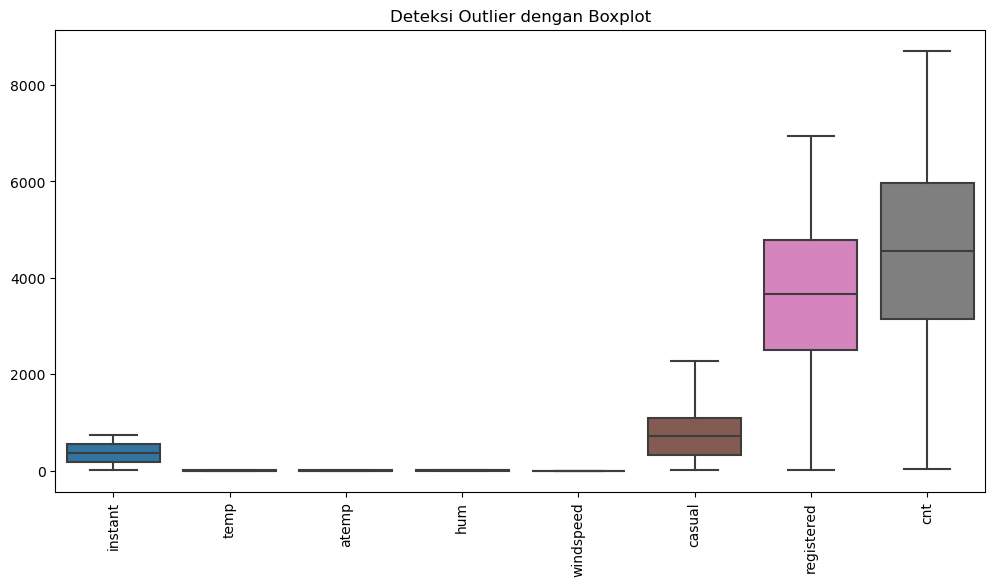

In [41]:
plt.figure(figsize=(12,6))
sns.boxplot(data=day.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.title("Deteksi Outlier dengan Boxplot")
plt.show()

**Insight:**
- Terlihat bahwa masalah outliers pada kolom **hum**, **windspeed**, dan **casual** sudah terselesaikan dengan Winsorizing 

#### Cleaning Data - `hour.csv`

##### Mengubah tipe data yang kurang sesuai

In [42]:
hour['dteday'] = pd.to_datetime(hour['dteday'])

In [43]:
print(hour.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


##### Menyelesaikan masalah outliers dengan Winsorizing

###### Kolom hum

In [44]:
q1 = hour['hum'].quantile(0.25)
q3 = hour['hum'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

hour['hum']=hour['hum'].apply(lambda x: batas_bawah if x < batas_bawah else (batas_atas if x > batas_atas else x))

###### Kolom windspeed

In [45]:
q1 = hour['windspeed'].quantile(0.25)
q3 = hour['windspeed'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

hour['windspeed']=hour['windspeed'].apply(lambda x: batas_bawah if x < batas_bawah else (batas_atas if x > batas_atas else x))

###### Kolom casual

In [46]:
q1 = hour['casual'].quantile(0.25)
q3 = hour['casual'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

hour['casual']=hour['casual'].apply(lambda x: batas_bawah if x < batas_bawah else (batas_atas if x > batas_atas else x))

###### Kolom registered

In [47]:
q1 = hour['registered'].quantile(0.25)
q3 = hour['registered'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

hour['registered']=hour['registered'].apply(lambda x: batas_bawah if x < batas_bawah else (batas_atas if x > batas_atas else x))

###### Kolom cnt

In [48]:
q1 = hour['cnt'].quantile(0.25)
q3 = hour['cnt'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

hour['cnt']=hour['cnt'].apply(lambda x: batas_bawah if x < batas_bawah else (batas_atas if x > batas_atas else x))

##### Mapping kolom dengan nilai angka dengan keterangannya

###### Kolom season

In [49]:
hour['season'] = hour['season'].map({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'})

###### Kolom holiday

In [50]:
hour['holiday'] = hour['holiday'].map({0: 'no', 1: 'yes'})

###### Kolom weekday

In [51]:
hour['weekday'] = hour['weekday'].map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})

###### Kolom workingday

In [52]:
hour['workingday'] = hour['workingday'].map({0: 'no', 1: 'yes'})

###### Kolom weathersit

In [53]:
hour['weathersit'] = hour['weathersit'].map({1: 'clear', 2: 'cloudy', 3: 'rain', 4: 'heavy rain'})

##### Menghapus kolom yang tidak diperlukan

In [54]:
hour = hour.drop(columns=['yr','mnth'])

##### Hasil Data Cleaning

In [55]:
hour

,instant,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,0,no,saturday,no,clear,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0
1,2,2011-01-01,winter,1,no,saturday,no,clear,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3,2011-01-01,winter,2,no,saturday,no,clear,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4,2011-01-01,winter,3,no,saturday,no,clear,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5,2011-01-01,winter,4,no,saturday,no,clear,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,winter,19,no,monday,yes,cloudy,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,17376,2012-12-31,winter,20,no,monday,yes,cloudy,0.26,0.2576,0.60,0.1642,8.0,81.0,89.0
17376,17377,2012-12-31,winter,21,no,monday,yes,clear,0.26,0.2576,0.60,0.1642,7.0,83.0,90.0
17377,17378,2012-12-31,winter,22,no,monday,yes,clear,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0


**Insight:**
- Kolom **dteday** diubah tipe datanya menjadi *datetime* untuk mempermudah analisis.
- Kolom **yr**, **month** dihapus untuk membuat tabel menjadi lebih ringkas, karena keterangan terkait tahun dan bulan sudah tertera di kolom **dteday**
- Kolom **season**, **holiday**, **weekday**, dan **weathersit** dimapping dengan keterangan untuk mempermudah memahami data, dan juga menghilangkan outliers pada **holiday** dan **weathersit**.

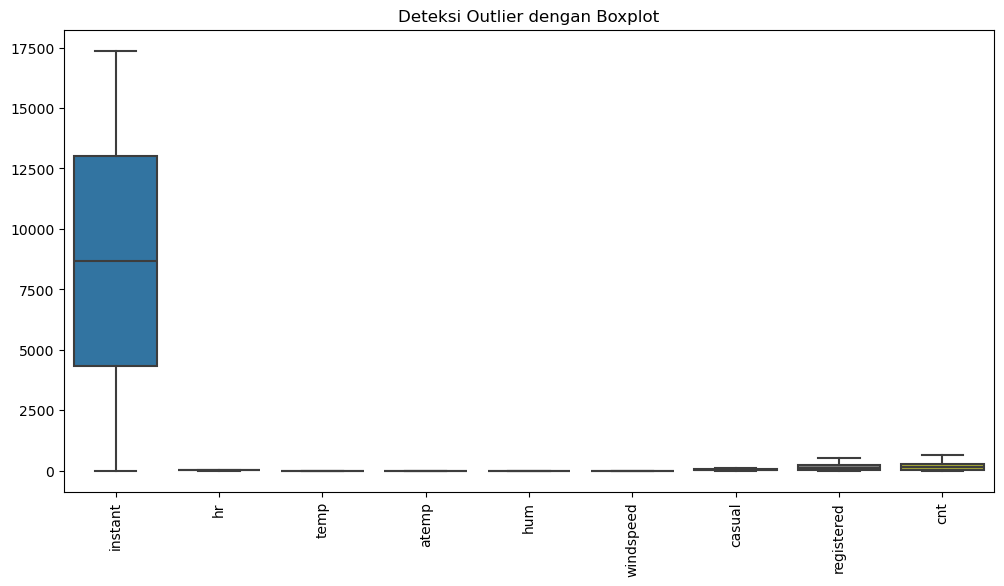

In [56]:
plt.figure(figsize=(12,6))
sns.boxplot(data=hour.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.title("Deteksi Outlier dengan Boxplot")
plt.show()

**Insight:**
- Terlihat bahwa masalah outliers pada kolom **hum**, **windspeed**, **casual**, **registered**, dan **cnt** sudah terselesaikan dengan Winsorizing 

## Exploratory Data Analysis (EDA)

In [57]:
day

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,no,saturday,no,cloudy,0.344167,0.363625,0.805833,0.160446,331.0,654,985
1,2,2011-01-02,winter,no,sunday,no,cloudy,0.363478,0.353739,0.696087,0.248539,131.0,670,801
2,3,2011-01-03,winter,no,monday,yes,clear,0.196364,0.189405,0.437273,0.248309,120.0,1229,1349
3,4,2011-01-04,winter,no,tuesday,yes,clear,0.200000,0.212122,0.590435,0.160296,108.0,1454,1562
4,5,2011-01-05,winter,no,wednesday,yes,clear,0.226957,0.229270,0.436957,0.186900,82.0,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,winter,no,thursday,yes,cloudy,0.254167,0.226642,0.652917,0.350133,247.0,1867,2114
727,728,2012-12-28,winter,no,friday,yes,cloudy,0.253333,0.255046,0.590000,0.155471,644.0,2451,3095
728,729,2012-12-29,winter,no,saturday,no,cloudy,0.253333,0.242400,0.752917,0.124383,159.0,1182,1341
729,730,2012-12-30,winter,no,sunday,no,clear,0.255833,0.231700,0.483333,0.350754,364.0,1432,1796


**Insight:**
- Dataset ini berisi data penggunaan sepeda berdasarkan berbagai faktor seperti musim, cuaca, hari libur, dan kecepatan angin. Data sudah bersih dan siap digunakan untuk visualisasi trend serta analisis pengaruh musim terhadap jumlah penggunaan sepeda.

**Keterangan Kolom dalam Dataset:** 
| Kolom       | Deskripsi |
|-------------|-----------|
| `instant`   | Indeks unik untuk setiap entri data |
| `dteday`    | Tanggal dalam format YYYY-MM-DD |
| `season`    | Musim |
| `holiday`   | Hari liburan / tanggal merah |
| `weekday`   | Hari dalam seminggu |
| `workingday`| Hari kerja |
| `weathersit` | Kondisi cuaca |
| `temp`      | Suhu aktual dalam skala normalisasi (0-1)|
| `atemp`     | Temperatur yang terasa dalam skala normalisasi (0-1) |
| `hum`       | Kelembapan dalam skala normalisasi (0-1) |
| `windspeed` | Kecepatan angin dalam skala normalisasi (0-1) |
| `casual`    | Jumlah pengguna sepeda yang tidak terdaftar |
| `registered` | Jumlah pengguna sepeda yang terdaftar |
| `cnt`       | Total jumlah penggunaan sepeda (`casual` + `registered`) |

In [58]:
day.to_csv("day_clean.csv", index=False)  


In [59]:
hour

,instant,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,0,no,saturday,no,clear,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0
1,2,2011-01-01,winter,1,no,saturday,no,clear,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3,2011-01-01,winter,2,no,saturday,no,clear,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4,2011-01-01,winter,3,no,saturday,no,clear,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5,2011-01-01,winter,4,no,saturday,no,clear,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,winter,19,no,monday,yes,cloudy,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,17376,2012-12-31,winter,20,no,monday,yes,cloudy,0.26,0.2576,0.60,0.1642,8.0,81.0,89.0
17376,17377,2012-12-31,winter,21,no,monday,yes,clear,0.26,0.2576,0.60,0.1642,7.0,83.0,90.0
17377,17378,2012-12-31,winter,22,no,monday,yes,clear,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0


**Insight:**
- Dataset ini berisi data penggunaan sepeda berdasarkan berbagai faktor seperti musim, cuaca, hari libur, dan kecepatan angin. Data sudah bersih dan siap digunakan untuk visualisasi trend serta analisis pengaruh musim terhadap jumlah penggunaan sepeda.

**Keterangan Kolom dalam Dataset:** 
| Kolom       | Deskripsi |
|-------------|-----------|
| `instant`   | Indeks unik untuk setiap entri data |
| `dteday`    | Tanggal dalam format YYYY-MM-DD |
| `season`    | Musim |
| `hr`        | Jam dalam format 24 jam (0-23) |
| `holiday`   | Hari libur / tanggal merah |
| `weekday`   | Hari dalam seminggu |
| `workingday`| Hari kerja |
| `weathersit` | Kondisi cuaca |
| `temp`      | Suhu aktual dalam skala normalisasi (0-1)|
| `atemp`     | Temperatur yang terasa dalam skala normalisasi (0-1) |
| `hum`       | Kelembapan dalam skala normalisasi (0-1) |
| `windspeed` | Kecepatan angin dalam skala normalisasi (0-1) |
| `casual`    | Jumlah pengguna sepeda yang tidak terdaftar |
| `registered` | Jumlah pengguna sepeda yang terdaftar |
| `cnt`       | Total jumlah penggunaan sepeda (`casual` + `registered`) |

**Insight:**
- Dataset sudah bersih dan rapi, dari situ dapat dilihat trend penggunaan sepeda tiap waktunya dan pengaruh musim terhadap penggunaan sepeda.

In [60]:
hour.to_csv("hour_clean.csv", index=False)  

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/var/folders/bk/8jjs__v10p30vy2gktd6wlq80000gn/T/ipykernel_6269/764861613.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hour, x='hr', y='cnt', estimator='mean', ci=None, marker='o')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


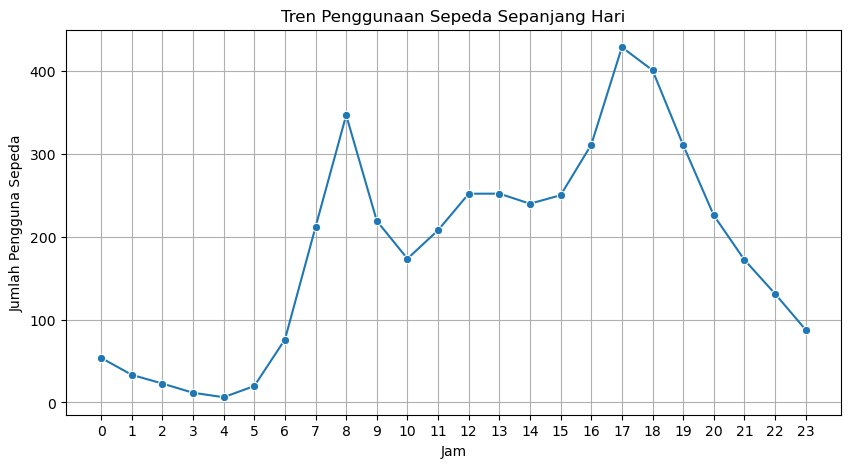

In [61]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=hour, x='hr', y='cnt', estimator='mean', ci=None, marker='o')
plt.xlabel("Jam")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.title("Tren Penggunaan Sepeda Sepanjang Hari")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

**Insight:**
- Puncak penggunaan sepeda terjadi sekitar pukul 08:00 dan 17:00-18:00.
- Penggunaan sepeda terendah terjadi sekitar pukul 00:00-05:00.
- Setelah puncak 08:00, penggunaan sepeda menurun tetapi cukup stabil pada pukul 10:00 hingga 15:00.
- Setelah pukul 18:00, penggunaan sepeda menurun secara bertahap.

### Pertanyaan 2:

#### Membuat grup penggunaan sepeda berdasarkan musim

In [62]:
penggunaan_per_musim = day.groupby('season')['cnt'].sum().reset_index()

#### Membuat urutan musim

In [63]:
urutan_musim = ['winter', 'spring', 'summer', 'fall']

penggunaan_per_musim['season'] = pd.Categorical(penggunaan_per_musim['season'], categories=urutan_musim, ordered=True)
penggunaan_per_musim = penggunaan_per_musim.sort_values('season')

#### Visualisasi

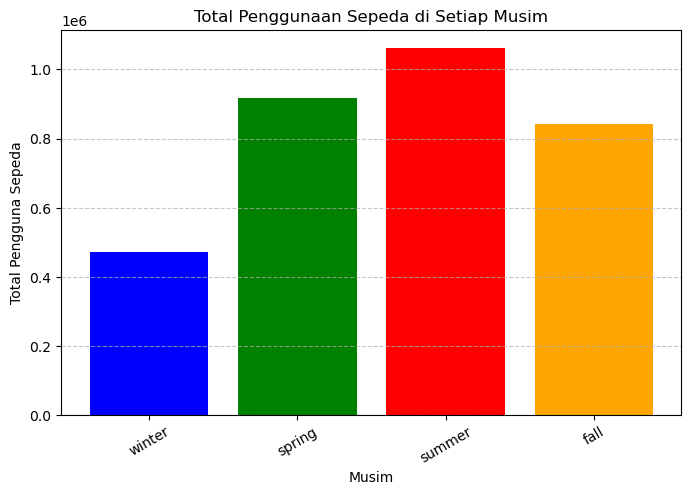

In [64]:
plt.figure(figsize=(8, 5))
plt.bar(penggunaan_per_musim['season'], penggunaan_per_musim['cnt'], color=['blue', 'green', 'red', 'orange'])

# Judul dan Label
plt.title("Total Penggunaan Sepeda di Setiap Musim")
plt.xlabel("Musim")
plt.ylabel("Total Pengguna Sepeda")
plt.xticks(rotation=30)  # Rotasi jika label terlalu panjang
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan plot
plt.show()


**Insight:**
- Setiap musim memiliki total penggunaan sepeda yang berbeda, ini berarti musim mempengaruhi jumlah dari penggunaan sepeda.
- Musim panas memiliki penggunaan sepeda tertinggi.
- Musim dingin memiliki penggunaan sepeda terendah.
- Musim semi dan musim gugur memiliki jumlah pengguna yang cukup tinggi, namun masih di bawah musim panas.

## Analisis Lanjutan (Clustering -Binning)

### Mendefinisikan bin dan label

In [65]:
bins = [0, 0.3, 0.6, 1] 
labels = ["cold", "normal", "hot"]


### Membuat kolom kategori suhu

In [66]:
day["temp_category"] = pd.cut(day["temp"], bins=bins, labels=labels)

### Analisis Jumlah Penggunaan Sepeda berdasarkan kategori Suhu

/var/folders/bk/8jjs__v10p30vy2gktd6wlq80000gn/T/ipykernel_6269/4269302682.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  usage_by_temp = day.groupby("temp_category")["cnt"].sum().reset_index()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


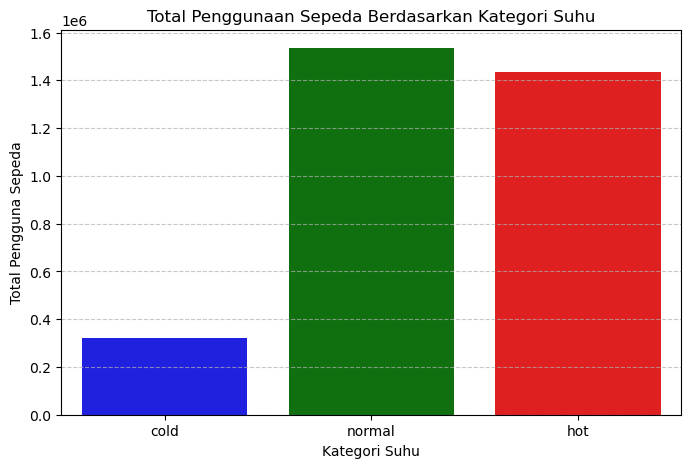

In [67]:
usage_by_temp = day.groupby("temp_category")["cnt"].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x="temp_category", y="cnt", data=usage_by_temp, palette=["blue", "green", "red"])
plt.title("Total Penggunaan Sepeda Berdasarkan Kategori Suhu")
plt.xlabel("Kategori Suhu")
plt.ylabel("Total Pengguna Sepeda")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight:**
- Penggunaan sepeda lebih rendah pada suhu/cuaca dingin.
- Penggunaan sepeda tertinggi ketika suhu berada pada rentang normal, namun pada suhu panas pun masih relatif tinggi.

## Conclusion

- Trend penggunaan sepeda sepanjang hari menunjukkan adanya jam-jam tertentu di mana penggunaan sepeda meningkat secara signifikan yaitu pada jam 08:00 dan 17:00-18:00. Jika ditelisik lebih dalam, jam-jam tersebut merupakan jam berangkat kerja/sekolah (08:00) dan pulang kerja/sekolah (17:00-18:00). Dengan mengetahui adanya permintaan penggunaan sepeda yang cukup tinggi di jam tersebut maka ketersediaan sepeda pada jam-jam tersebut bisa lebih dioptimalkan.

- Pada hasil visualisasi menunjukkan bahwa adanya pengaruh musim terhadap total penggunaan sepeda. Total penggunaan sepeda tertinggi berada pada musim panas, dan total penggunaan sepeda terendah berada pada musim dingin. Ini berarti semakin hangat dan nyaman cuaca, semakin banyak orang-orang menggunakan sepeda. Faktor lain yang mempengaruhi meningkatnya penggunaan sepeda pada musim panas mungkin dikarenakan adanya juga liburan musim panas. Dengan mengetahui adanya pengaruh musim terhadap total penggunaan sepeda, ini dapat dimanfaatkan dengan menyesuaikan ketersediaan sepeda untuk tiap musimnya. 

- Analisis lanjutan terhadap jumlah penggunaan sepeda berdasarkan suhu menunjukkan bahwa penggunaan sepeda paling rendah saat suhu dingin, sementara pada rentang suhu normal dan panas cenderung lebih tinggi. Dengan memahami pola ini, penyedia sepeda dapat menyesuaikan strategi, seperti mengurangi persediaan sepeda saat cuaca dingin atau jika layanan ini bersifat berbayar, dapat menawarkan diskon untuk mendorong peningkatan penggunaan sepeda, sehingga jumlah pengguna tetap stabil seperti pada suhu normal maupun panas.
